In [4]:
#Create a model for Multiple Linear Regression
import pandas as pd
#load data
df = pd.read_csv('insurance_pre.csv')
df = pd.get_dummies(df, drop_first=True)
#df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [6]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
# Split Input and Output
x_values = df.iloc[:,df.columns != 'charges']
y_values = df.iloc[:,df.columns == 'charges']

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)

In [12]:
# Train XGBOOST Model
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Train XGBoost Model
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)  
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Error measurement

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.7429
RMSE: 5854.0311


In [ ]:
# Define the parameter grid
param_grid = {
    # Number of trees
    'n_estimators': [50, 100, 150,200],
    # Tree depth
    'max_depth': [3, 4, 5],
    # Minimum loss reduction
    'gamma': [0, 0.1, 0.3, 0.5],      
    # L2 regularization term
    'lambda': [1, 1.5, 2],            
    # Learning rate
    'eta': [0.01, 0.1, 0.2]           
}

In [20]:

from sklearn.model_selection import GridSearchCV as gsc

# Use GridSearchCV to search best hyperparameters
grid_search = gsc(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='r2',  # Optimizing for R²
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit the model on the training data
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [21]:
# Best parameters
print("Best Parameters Found:", grid_search.best_params_)
print("\nBest Parameters:", grid_search.best_params_)
print("Best R² Score from tuning:", grid_search.best_score_)

Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best R² Score from tuning: 0.8698450326919556


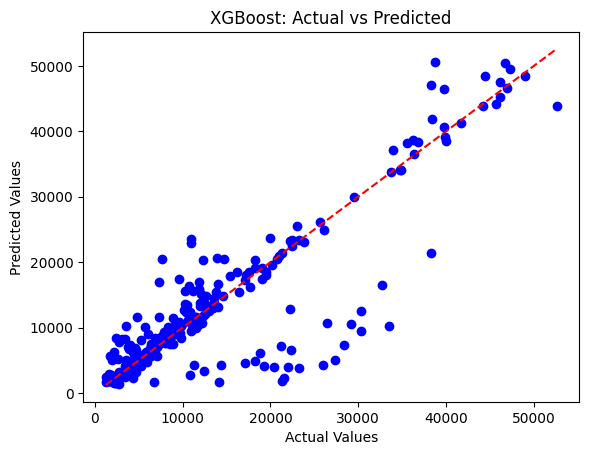

In [22]:
#GRAPH 1: Actual vs Predicted
import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

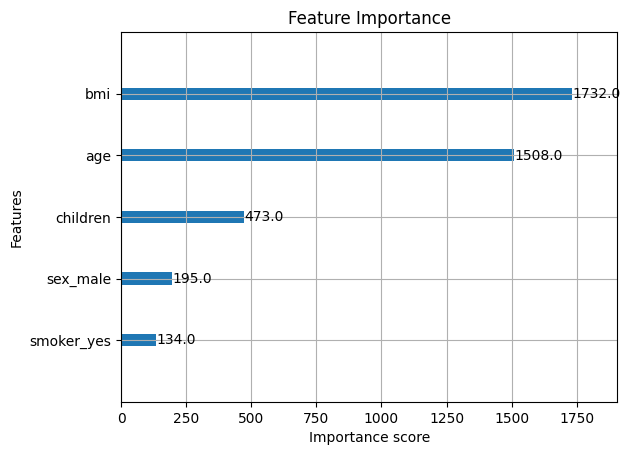

In [23]:
#GRAPH 2: Feature Importance
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

In [25]:
#save the model using pickle
import pickle as pkl
with open('xgb_model.sav', 'wb') as file:
    pkl.dump(grid_search, file)

# Load the model
with open('xgb_model.sav', 'rb') as file:
    loaded_model = pkl.load(file)
# Predict using the loaded model
loaded_y_pred = loaded_model.predict([[46,23.8,2,1,0]])
print("Prediction using loaded model:", loaded_y_pred)

Prediction using loaded model: [9078.374]
